In [1]:
# Import Libraries required for the below Data Analytics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset I will be using

df = pd.read_csv('BigmacPrice.csv')

In [3]:
# View an example of the data we will be working with

df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [4]:
# I want to clean the dataset up and reduce the columns im working with to simply date - country - Price in euro to make it easier to read and more relatable

In [5]:
# I will start cleaning my dataset by removing the uncessary columns

columns_to_remove = ['currency_code', 'local_price', 'dollar_ex']
df.drop(columns=columns_to_remove, inplace=True)

#Display cleaned Dataset
df.head()

,date,name,dollar_price
0,2000-04-01,Argentina,2.50
1,2000-04-01,Australia,2.59
2,2000-04-01,Brazil,2.95
3,2000-04-01,Britain,1.90
4,2000-04-01,Canada,2.85


In [6]:
# Next i will change the final Column (dollar_price) into a more relatable local currency such as euro

# I will convert the dollar_ price collumn to EURO using the current price of 1 dollar
# I will also change column name to country

# Define the conversion rate
usd_to_euro_rate = 0.94

# Rename the "dollar_price" column to "Euro"
df.rename(columns={'dollar_price': 'Euro'}, inplace=True)

# Convert the values in the "Euro" column based on the conversion rate
df['Euro'] = df['Euro'] * usd_to_euro_rate

# Rename the "name" column to "country"
df.rename(columns={'name': 'Country'}, inplace=True)

# Display the modified DataFrame
df

,date,Country,Euro
0,2000-04-01,Argentina,2.3500
1,2000-04-01,Australia,2.4346
2,2000-04-01,Brazil,2.7730
3,2000-04-01,Britain,1.7860
4,2000-04-01,Canada,2.6790
...,...,...,...
1941,2022-07-01,United Arab Emirates,5.6400
1942,2022-07-01,United States,4.8410
1943,2022-07-01,Uruguay,5.8468
1944,2022-07-01,Venezuela,1.8800


In [7]:
# Im going to reduce the euro decimals to 2 points and remove all duplicate from the data set

# Round the "Euro" column to two decimal places
df['Euro'] = df['Euro'].round(2)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df

,date,Country,Euro
0,2000-04-01,Argentina,2.35
1,2000-04-01,Australia,2.43
2,2000-04-01,Brazil,2.77
3,2000-04-01,Britain,1.79
4,2000-04-01,Canada,2.68
...,...,...,...
1941,2022-07-01,United Arab Emirates,5.64
1942,2022-07-01,United States,4.84
1943,2022-07-01,Uruguay,5.85
1944,2022-07-01,Venezuela,1.88


In [8]:
# lets check if there is now any missing values and remove all columns at and below 0.00 in euro column

# Delete rows where the "Euro" column is 0.00 or less
df = df[df['Euro'] > 0]

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with missing values (if any) and the count of missing values in each column
print("Missing Values:\n")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")
    else:
        print(f"{column}: No missing values")


Missing Values:

date: No missing values
Country: No missing values
Euro: No missing values


In [9]:
# Display the cleaned DataFrame
df

,date,Country,Euro
0,2000-04-01,Argentina,2.35
1,2000-04-01,Australia,2.43
2,2000-04-01,Brazil,2.77
3,2000-04-01,Britain,1.79
4,2000-04-01,Canada,2.68
...,...,...,...
1941,2022-07-01,United Arab Emirates,5.64
1942,2022-07-01,United States,4.84
1943,2022-07-01,Uruguay,5.85
1944,2022-07-01,Venezuela,1.88


In [10]:
# Using numpy and using a custom function to have reusable code, i am going to run a simple analytics on the dataset

# Define a custom function to find the most expensive and cheapest Big Macs
def find_most_and_least_expensive_big_mac(dataframe):
    # Find the row with the maximum Euro price
    most_expensive_row = dataframe.loc[dataframe['Euro'].idxmax()]

    # Find the row with the minimum Euro price
    cheapest_row = dataframe.loc[dataframe['Euro'].idxmin()]

    return most_expensive_row, cheapest_row

# Define a custom function to calculate the average price of Big Macs
def calculate_average_price(dataframe):
    average_price = np.mean(dataframe['Euro'])
    return average_price

# Call the custom functions to get the results
most_expensive, cheapest = find_most_and_least_expensive_big_mac(df)
average_price = calculate_average_price(df)

# Display the results
print("Most Expensive Big Mac:")
print(most_expensive)

print("\nCheapest Big Mac:")
print(cheapest)

print(f"\nAverage Price of Big Macs: {average_price:.2f} Euro")


Most Expensive Big Mac:
date       2013-01-01
Country        Brazil
Euro            10.58
Name: 687, dtype: object

Cheapest Big Mac:
date       2015-07-01
Country     Venezuela
Euro             0.63
Name: 1016, dtype: object

Average Price of Big Macs: 3.36 Euro


In [11]:
# Lets create a dictionary for the top 10 most expensive Big macs by country and date

# Create an empty dictionary to store the most expensive Big Mac for each country
most_expensive_by_country = {}

# Iterate through unique countries in the DataFrame
for country in df['Country'].unique():
    # Filter the DataFrame for the current country
    country_df = df[df['Country'] == country]
    
    # Find the row with the maximum Euro price for the current country
    most_expensive_row = country_df.loc[country_df['Euro'].idxmax()]

    # Add the information to the dictionary
    most_expensive_by_country[country] = {
        'date': most_expensive_row['date'],
        'Euro Price': most_expensive_row['Euro']
    }

# Sort the dictionary by Euro Price in descending order to get the top 10 most expensive
top_10_most_expensive = dict(sorted(most_expensive_by_country.items(), key=lambda x: x[1]['Euro Price'], reverse=True)[:10])

# Display the dictionary of the top 10 most expensive Big Macs by country
for i, (country, info) in enumerate(top_10_most_expensive.items(), start=1):
    print(f"{i}. Country: {country}, date: {info['date']}, Euro Price: {info['Euro Price']:.2f} Euro")

1. Country: Brazil, date: 2013-01-01, Euro Price: 10.58 Euro
2. Country: Venezuela, date: 2013-01-01, Euro Price: 9.16 Euro
3. Country: Norway, date: 2011-07-01, Euro Price: 8.46 Euro
4. Country: Turkey, date: 2013-07-01, Euro Price: 7.99 Euro
5. Country: Sweden, date: 2011-07-01, Euro Price: 7.59 Euro
6. Country: New Zealand, date: 2022-07-01, Euro Price: 6.67 Euro
7. Country: Denmark, date: 2008-06-01, Euro Price: 6.58 Euro
8. Country: Canada, date: 2020-07-01, Euro Price: 6.47 Euro
9. Country: Australia, date: 2022-07-01, Euro Price: 6.30 Euro
10. Country: Switzerland, date: 2008-06-01, Euro Price: 6.11 Euro


In [12]:
# Lets create a few charts using my cleaned dataset to have a better visualization of the data

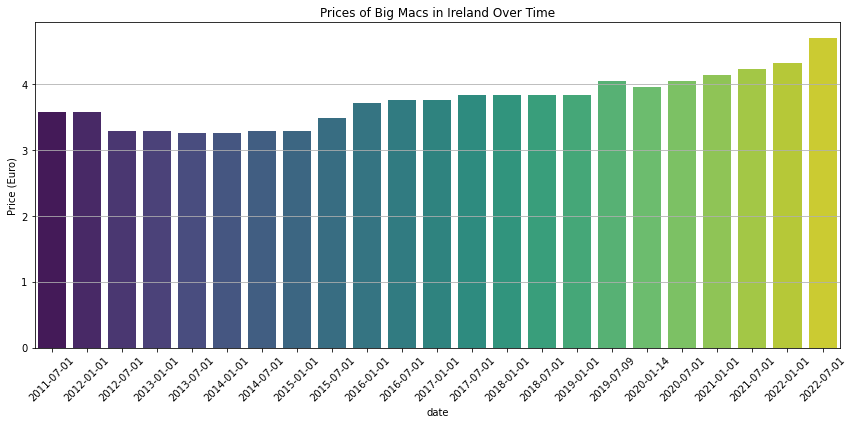

In [13]:
# Creating a bar plot for Ireland and the price of big macs over time

# Filter the DataFrame for Ireland
ireland_df = df[df['Country'] == 'Ireland']

# Create a bar plot to visualize the prices of Big Macs in Ireland over time
plt.figure(figsize=(12, 6))
sns.barplot(data=ireland_df, x='date', y='Euro', palette='viridis')
plt.title('Prices of Big Macs in Ireland Over Time')
plt.xlabel('date')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

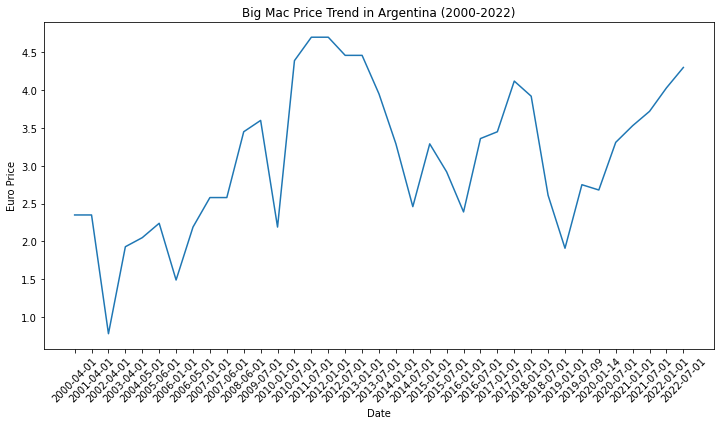

In [20]:
# Line plot to show prices of bigmac in argentina from 2000-2022
# Select a specific country (e.g., Argentina)
country_data = df[df['Country'] == 'Argentina']

# Create a time series line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Euro', data=country_data)
plt.title('Big Mac Price Trend in Argentina (2000-2022)')
plt.xlabel('Date')
plt.ylabel('Euro Price')
plt.xticks(rotation=45)
plt.show()

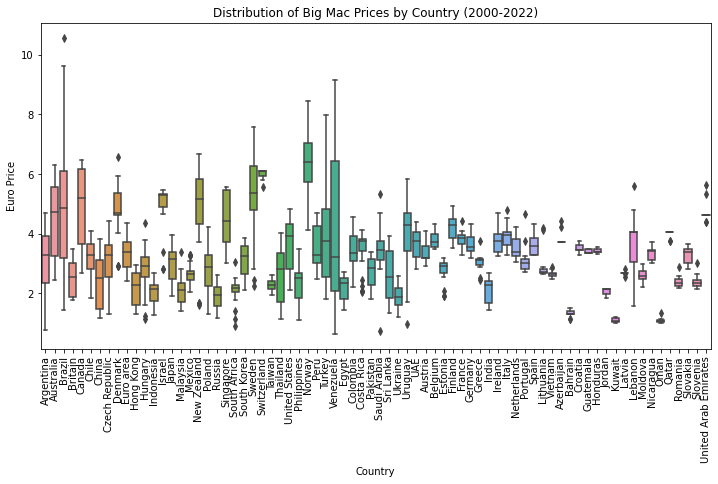

In [21]:
# The distribution of Big Mac prices from 2000-2022
# Create a box plot to show price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Euro', data=df)
plt.title('Distribution of Big Mac Prices by Country (2000-2022)')
plt.xlabel('Country')
plt.ylabel('Euro Price')
plt.xticks(rotation=90)
plt.show()

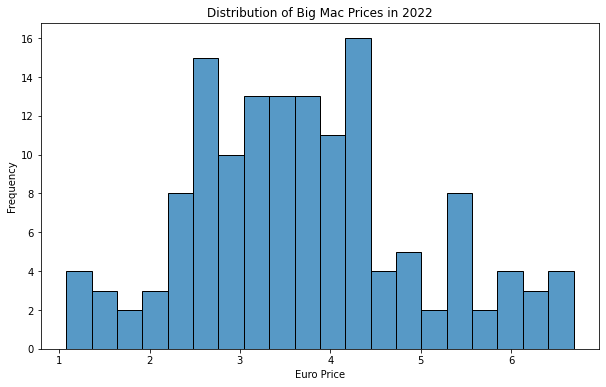

In [23]:
# The distribution of Big Mac prices for a specific year (e.g., 2022)
# Filter data for a specific year (e.g., 2022)
year_data = df[df['date'].str.startswith('2022')]

# Create a histogram to visualize price distribution for 2022
plt.figure(figsize=(10, 6))
sns.histplot(data=year_data, x='Euro', bins=20)
plt.title('Distribution of Big Mac Prices in 2022')
plt.xlabel('Euro Price')
plt.ylabel('Frequency')
plt.show()

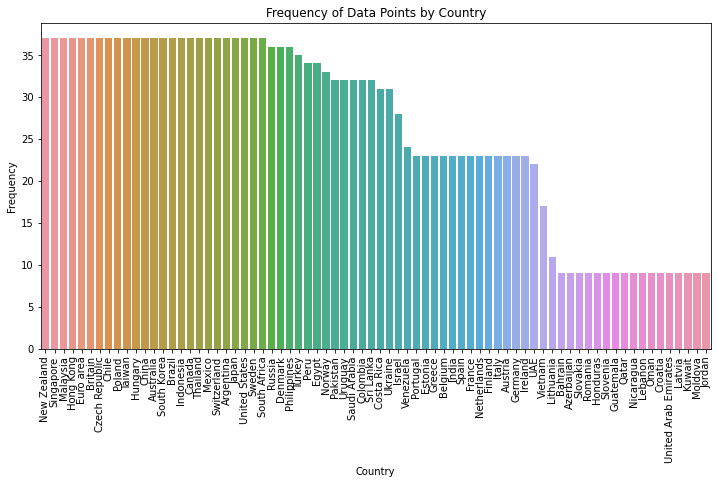

In [24]:
# The frequency of data points (observations) for each country
# Count the number of data points for each country
country_counts = df['Country'].value_counts()

# Create a bar plot for country frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Frequency of Data Points by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Below are eaxamples of requirments for achieving points in my dataset.

In [15]:
# Example on importing data using web scraping

# Below the data imported from IMDB using web scraping to get the top 10 funniest movies

import requests
from bs4 import BeautifulSoup

# IMDb URL for the "Top 250 Comedy Movies" list
url = "https://www.imdb.com/search/title/?genres=comedy&sort=num_votes,desc&title_type=feature&num_votes=5000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c2&pf_rd_r=MSBGDAXKS5XB6ZDBV4T4&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1"

# Send a GET request to the IMDb URL
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the list of movie titles and ratings
    movie_list = soup.find_all("div", class_="lister-item-content")

    # Extract the top 10 funniest movies
    top_10_movies = []
    for movie in movie_list[:10]:
        title = movie.h3.a.text.strip()
        rating = movie.find("div", class_="inline-block ratings-imdb-rating").strong.text
        top_10_movies.append({"Title": title, "IMDb Rating": rating})

    # Print the top 10 funniest movies
    for idx, movie in enumerate(top_10_movies, start=1):
        print(f"{idx}. {movie['Title']} - IMDb Rating: {movie['IMDb Rating']}")

else:
    print("Failed to fetch IMDb data.")



1. The Wolf of Wall Street - IMDb Rating: 8.2
2. Back to the Future - IMDb Rating: 8.5
3. Guardians of the Galaxy - IMDb Rating: 8.0
4. The Truman Show - IMDb Rating: 8.2
5. Up - IMDb Rating: 8.3
6. Deadpool - IMDb Rating: 8.0
7. Finding Nemo - IMDb Rating: 8.2
8. Toy Story - IMDb Rating: 8.3
9. Monsters, Inc. - IMDb Rating: 8.1
10. The Intouchables - IMDb Rating: 8.5


In [16]:
# Example of an iterator to loop through a list of numbers

numbers = [1, 2, 3, 4, 5]

# Create an iterator from the list
iter_numbers = iter(numbers)

# Use the iterator to retrieve elements
for num in iter_numbers:
    print(num)


1
2
3
4
5


In [17]:
# Example of merging dataframes

# Createing a new dataframe
data = {
    'date': ['2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01', '2000-04-01'],
    'name': ['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada'],
    'Euro': [2.35, 2.43, 2.77, 1.79, 2.68]
}
df_example = pd.DataFrame(data)

# Concatenate the two DataFrames vertically
example_merged_df = pd.concat([df, df_example], ignore_index=True)

# Display the merged DataFrame
print(example_merged_df)


            date    Country  Euro       name
0     2000-04-01  Argentina  2.35        NaN
1     2000-04-01  Australia  2.43        NaN
2     2000-04-01     Brazil  2.77        NaN
3     2000-04-01    Britain  1.79        NaN
4     2000-04-01     Canada  2.68        NaN
...          ...        ...   ...        ...
1945  2000-04-01        NaN  2.35  Argentina
1946  2000-04-01        NaN  2.43  Australia
1947  2000-04-01        NaN  2.77     Brazil
1948  2000-04-01        NaN  1.79    Britain
1949  2000-04-01        NaN  2.68     Canada

[1950 rows x 4 columns]


In [18]:
# Machine Learning
# Below example using the data for machine learning and why Hyperparameter tuning and boosting are not relevant

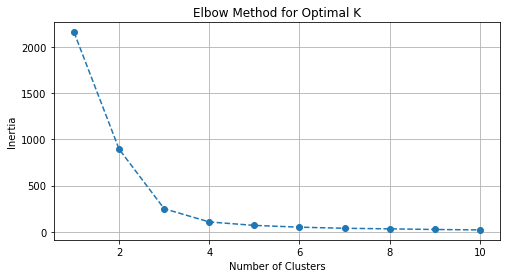

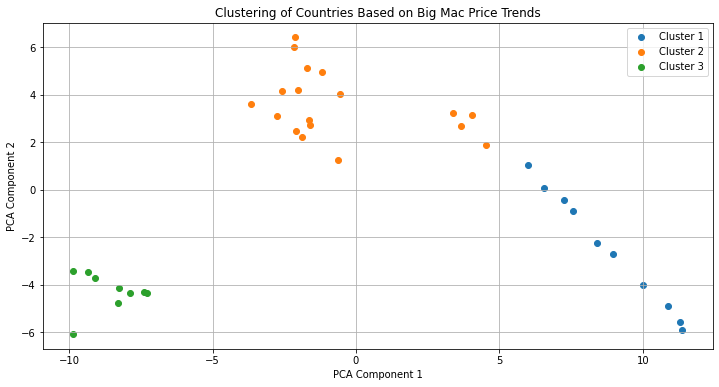

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pivot the data to have countries as columns and date as rows
df_pivot = df.pivot(index='date', columns='Country', values='Euro')

# Fill missing values (if any) with zeros or any suitable method
df_pivot = df_pivot.fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pivot)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Based on the Elbow curve, select the optimal number of clusters
optimal_k = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(reduced_data)

# Add cluster labels to the original dataframe
df_pivot['Cluster'] = cluster_labels

# Visualize the clustered data
plt.figure(figsize=(12, 6))
for cluster in range(optimal_k):
    cluster_data = reduced_data[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Countries Based on Big Mac Price Trends')
plt.legend()
plt.grid()
plt.show()


# Hyperparameter tuning and boosting are not relevant for K-Means clustering
# as K-Means is an unsupervised clustering algorithm that does not have
# hyperparameters to fine-tune or a boosting mechanism. K-Means relies on
# distance metrics to cluster data based on similarity.
